In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")


In [56]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [57]:
print(len(df["name"].unique()))

1491


In [58]:
df["brand"]=df["name"].str.split().str[0]
df["model"]=df["name"].str.split().str[1]

In [59]:
df.drop("name",axis=1,inplace=True)

In [60]:
len(df["brand"].unique())

29

In [61]:
df["brand"]=df["brand"].replace(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'],[i for i in range(29)])

/tmp/ipython-input-61-602650693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["brand"]=df["brand"].replace(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',


In [62]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [63]:
df["owner"]=df["owner"].replace(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'],[0,1,2,3,4])
df["fuel"]=df["fuel"].replace(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],[0,1,2,3,4])
df["transmission"]=df["transmission"].map({"Manual":0,"Automatic":1})

/tmp/ipython-input-63-979145183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["owner"]=df["owner"].replace(['First Owner', 'Second Owner', 'Fourth & Above Owner',
/tmp/ipython-input-63-979145183.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["fuel"]=df["fuel"].replace(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],[0,1,2,3,4])


In [64]:
df["seller_type"]=df["seller_type"].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[0,1,2])

/tmp/ipython-input-64-2596704206.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["seller_type"]=df["seller_type"].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[0,1,2])


In [66]:
df.drop("model",axis=1,inplace=True)

In [67]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,0,0,0,0,0
1,2007,135000,50000,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1
3,2017,250000,46000,0,0,0,0,2
4,2014,450000,141000,1,0,0,1,3
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,1,1
4336,2014,409999,80000,1,0,0,1,1
4337,2009,110000,83000,0,0,0,1,0
4338,2016,865000,90000,1,0,0,0,1


In [68]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [79]:
y1_pred=model1.predict(X_test)
y1_pred

array([ 3.46452286e+05,  6.45191436e+05,  6.65965283e+04,  4.36483316e+05,
        1.53672880e+06,  2.30923499e+05,  5.76514029e+05,  2.65318309e+05,
        5.65560922e+05,  4.38634465e+05,  6.17872237e+05,  5.42153474e+05,
        6.09658844e+05,  4.87300638e+04,  7.15292045e+05,  4.43552237e+05,
        8.87883458e+05,  1.34199053e+06,  1.28808651e+05,  1.47782496e+06,
        5.95173351e+05,  6.97799774e+05,  4.62759489e+05,  6.87285190e+05,
        2.41658443e+05,  6.41186179e+05,  7.29705418e+05,  2.69913751e+05,
        4.20997935e+05,  5.51077265e+05, -6.11925806e+04,  1.46439476e+06,
        6.66030103e+05,  7.35023525e+05,  5.17885604e+05,  4.01398014e+05,
        6.72957703e+05,  4.70385296e+05,  1.49585307e+05,  5.20754423e+05,
        5.06655230e+05,  6.06661151e+05,  7.26635137e+05,  4.07899349e+05,
        3.46210718e+05,  2.99673335e+05,  5.31507034e+05,  5.09740810e+05,
        7.85612955e+05,  5.32483423e+05,  1.54904627e+05,  3.03300285e+05,
        5.27983067e+05,  

In [80]:
model=XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)


In [81]:
y_pred

array([ 186157.34 ,  424725.12 ,  167388.25 ,  449466.97 , 1315456.   ,
        188507.72 ,  515023.4  ,  164346.11 ,  551502.   ,  328092.4  ,
        559751.8  ,  770123.3  ,  550863.1  ,  161440.95 ,  836427.56 ,
        427124.9  ,  904184.8  , 1665243.1  ,  132708.67 ,  833683.94 ,
        551577.94 , 1203154.   ,  404961.1  ,  937984.4  ,  214895.11 ,
        621066.25 ,  825974.   ,  282743.06 ,  456227.38 ,  693662.8  ,
         99824.92 ,  676410.2  ,  432414.25 ,  935228.9  ,  566187.1  ,
        217313.75 ,  788920.75 ,  386231.62 ,  141128.06 ,  504290.8  ,
        521925.88 ,  337477.12 ,  754361.8  ,  623272.75 ,  180913.45 ,
        177555.66 ,  282196.12 ,  529138.4  ,  895007.3  ,  338009.66 ,
        130174.33 ,  290064.03 ,  733019.06 ,  128702.99 ,  449350.78 ,
        776693.6  ,  701969.   ,  206882.05 ,  272395.66 ,  386138.94 ,
        198028.66 ,  453888.4  , 1998081.6  ,  811275.4  ,  124380.24 ,
        263064.38 ,  733019.06 ,  175486.2  ,  122660.45 ,  4576

In [82]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 289693.13
R² Score: 0.72


In [83]:
df.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,0,0,0,0,0


In [101]:
input_data=pd.DataFrame([[2021,6000,1,1,0,0,0]],columns=X.columns)

In [102]:
input_data
print(model.predict(input_data))


[863882.75]


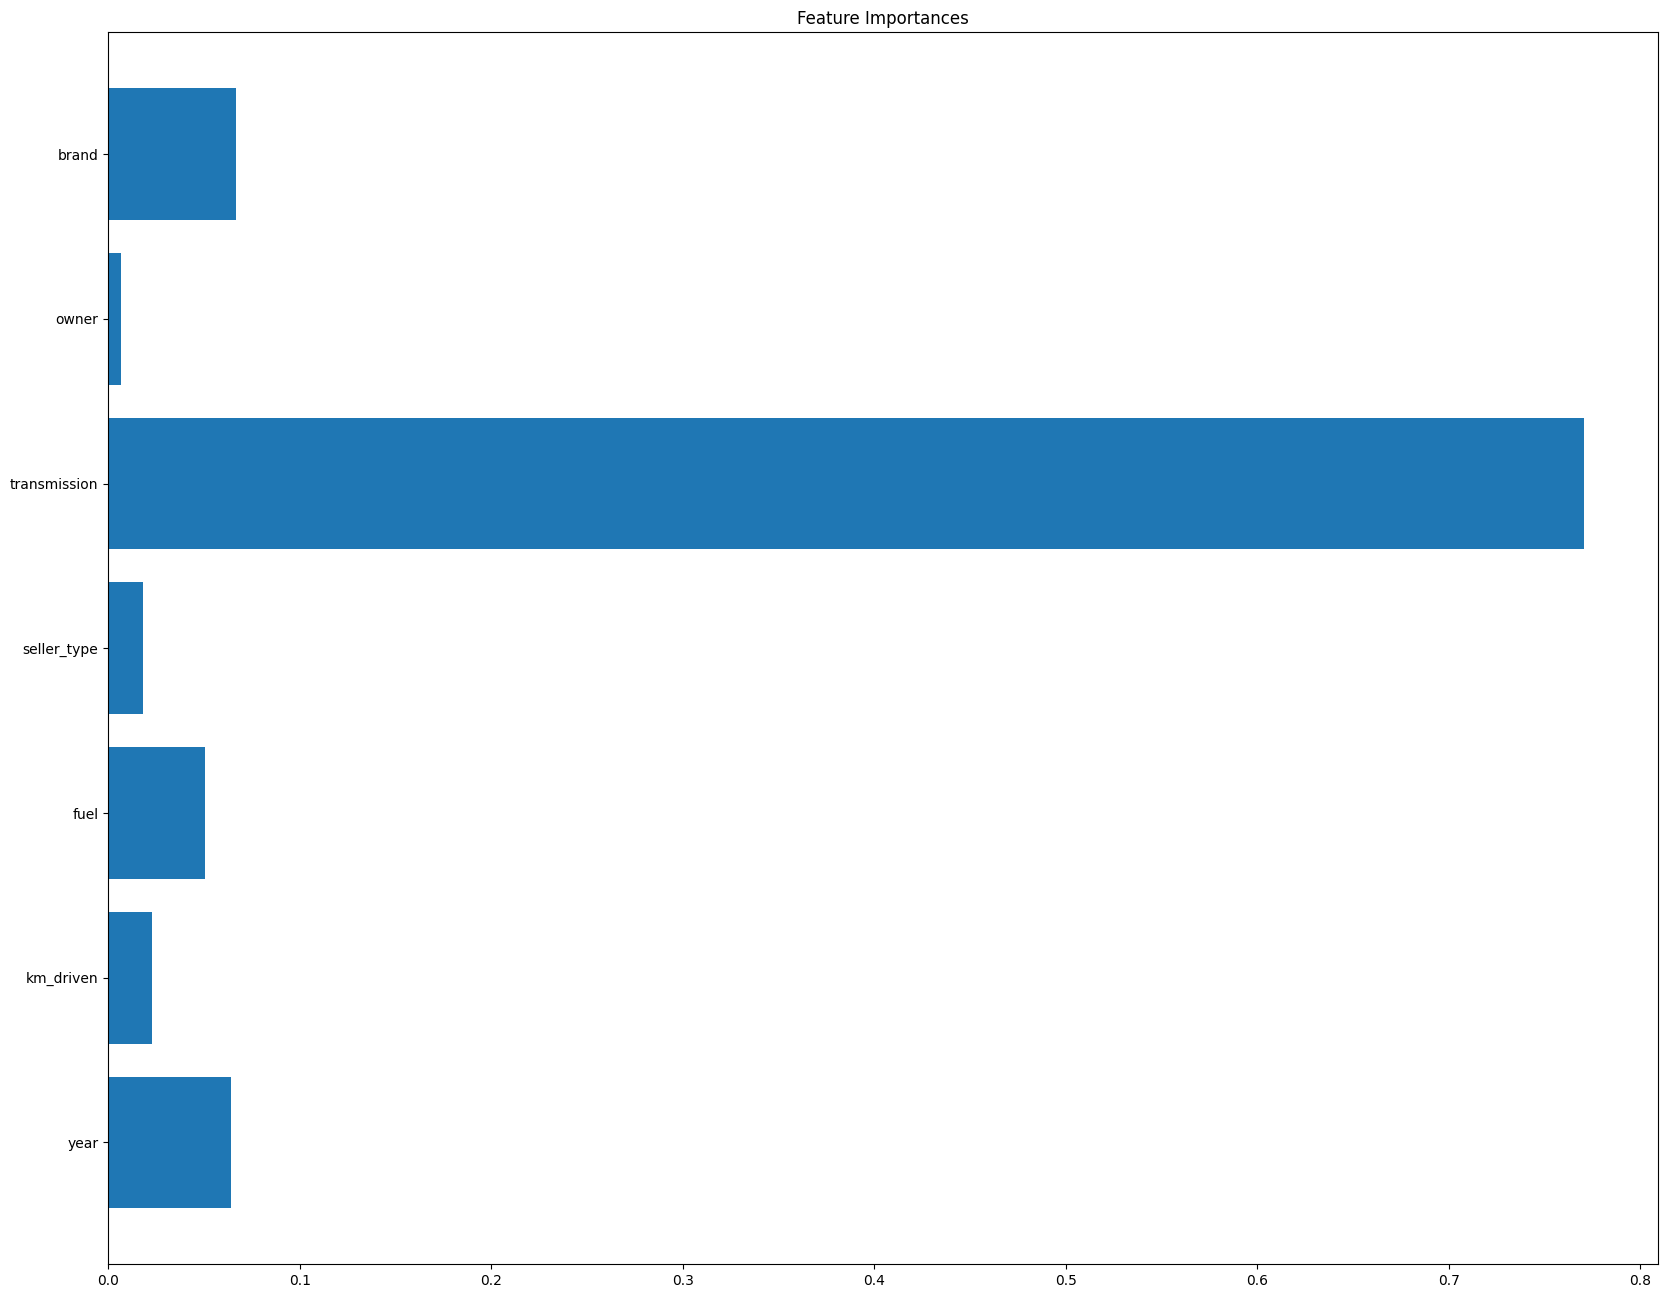

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.show()


In [18]:
df

,year,selling_price,km_driven,transmission,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,...,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,2017,250000,46000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4336,2014,409999,80000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4337,2009,110000,83000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4338,2016,865000,90000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [103]:
import pickle

pickle.dump(model,open("model.pkl","wb"))